<a href="https://colab.research.google.com/github/swathysathesh/spam-sms-detection/blob/main/ham_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SPAM SMS DETECTION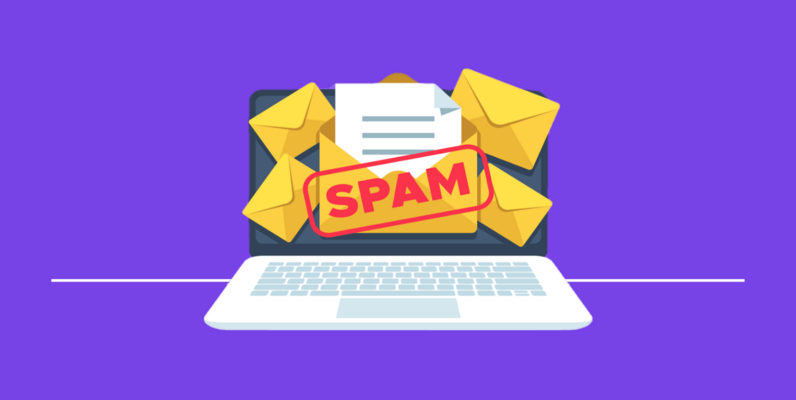**

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

#Importing the libraries & Loading the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df=pd.read_csv('/content/spam (1).csv',encoding='ISO-8859-1')
df.columns=['spam','text','v1','v2','v3']
df

,spam,text,v1,v2,v3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#drop unwanted columns

In [ ]:
df.drop(['v1','v2','v3'],axis=1,inplace=True)

#Dataset overview

In [ ]:
df.head()

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,spam,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.shape

(5572, 2)

#Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#Dataset Types

In [ ]:
df.dtypes

spam    object
text    object
dtype: object

#checking Null values

In [ ]:
df.isna().sum()

spam    0
text    0
dtype: int64

#Drop duplicate values

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['spam'].value_counts()

spam
ham     4516
spam     653
Name: count, dtype: int64

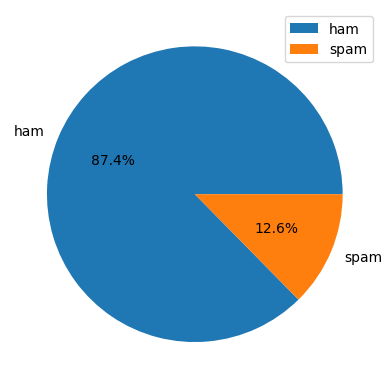

In [ ]:
plt.pie(x=df['spam'].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.legend()

In [ ]:
tweets=df.text
tweets

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [ ]:
df['spam']=df['spam'].map({'ham':0,'spam':1})
df

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


#Tokenization

In [ ]:
from nltk import TweetTokenizer
tt=TweetTokenizer()
tweets=tweets.apply(lambda x:tt.tokenize(x)).apply(lambda x:' '.join(x))
tweets

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: text, Length: 5169, dtype: object

#Remove the special characters

In [ ]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: text, Length: 5169, dtype: object

#Remove the word length less than 3

In [ ]:
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([i for i in word_tokenize(x) if len(i)>=3]))
tweets

0       until jurong point crazy Available only bugis ...
1                              lar ... Joking wif oni ...
2       Free entry wkly comp win Cup final tkts 21st M...
3              dun say early hor ... already then say ...
4         Nah n't think goes usf lives around here though
                              ...                        
5567    This the 2nd time have tried contact have won ...
5568                            Will going esplanade home
5569     Pity was mood for that ... any other suggestions
5570    The guy did some bitching but acted like inter...
5571                               Rofl Its true its name
Name: text, Length: 5169, dtype: object

#Stemming

In [ ]:
from nltk.stem import SnowballStemmer
sb=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[sb.stem(i.lower()) for i in tt.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0       until jurong point crazi avail onli bugi great...
1                                lar ... joke wif oni ...
2       free entri wkli comp win cup final tkts 21st m...
3              dun say earli hor ... alreadi then say ...
4           nah n't think goe usf live around here though
                              ...                        
5567    this the 2nd time have tri contact have won th...
5568                                will go esplanad home
5569         piti was mood for that ... ani other suggest
5570    the guy did some bitch but act like interest b...
5571                                 rofl it true it name
Name: text, Length: 5169, dtype: object

#Removing Stopwords

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tt.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

0       jurong point crazi avail onli bugi great world...
1                                lar ... joke wif oni ...
2       free entri wkli comp win cup final tkts 21st m...
3                   dun say earli hor ... alreadi say ...
4                nah n't think goe usf live around though
                              ...                        
5567    2nd time tri contact 750 pound prize claim eas...
5568                                     go esplanad home
5569                            piti mood ... ani suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

#Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweets)
train_data.shape

(5169, 7041)

In [ ]:
x=train_data.toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df['spam'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
y.ndim

1

#Split into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

#Model Creation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#Perfomance Evalution

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9548678272082527
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1331
           1       1.00      0.68      0.81       220

    accuracy                           0.95      1551
   macro avg       0.98      0.84      0.89      1551
weighted avg       0.96      0.95      0.95      1551

[[1331    0]
 [  70  150]]
